# Mobility Patterns in the United States

To understand the migration patterns in the US, data from the [American Community Survey (ACS)](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) were used.

### The data

The tables provide information regarding geographical mobility for persons relative to their residence at the time they were surveyed.

In each table, the categories describing mobility include:
- Same house 1 year ago
- Moved within same county
- Moved from different county within same state
- Moved from different state
- Moved from abroad

Different age groups include:
- 1 to 4 years
- 5 to 17 years
- 18 and 19 years
- 20 to 24 years
- 25 to 29 years
- 30 to 34 years
- 35 to 39 years
- 40 to 44 years
- 45 to 49 years
- 50 to 54 years
- 55 to 59 years
- 60 to 64 years
- 65 to 69 years
- 70 to 74 years
- 75 years and over

In [31]:
# import pandas mainly for data cleaning
# import sqlite3 mainly for data aggregation
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Here are the top five rows of the original data

In [32]:
m_17 = pd.read_csv('ACS_17_5YR_B07001_with_ann.csv', header=1)
m_17.head()

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - 1 to 4 years,Margin of Error; Total: - 1 to 4 years,Estimate; Total: - 5 to 17 years,Margin of Error; Total: - 5 to 17 years,Estimate; Total: - 18 and 19 years,...,Estimate; Total: - Moved from abroad: - 55 to 59 years,Margin of Error; Total: - Moved from abroad: - 55 to 59 years,Estimate; Total: - Moved from abroad: - 60 to 64 years,Margin of Error; Total: - Moved from abroad: - 60 to 64 years,Estimate; Total: - Moved from abroad: - 65 to 69 years,Margin of Error; Total: - Moved from abroad: - 65 to 69 years,Estimate; Total: - Moved from abroad: - 70 to 74 years,Margin of Error; Total: - Moved from abroad: - 70 to 74 years,Estimate; Total: - Moved from abroad: - 75 years and over,Margin of Error; Total: - Moved from abroad: - 75 years and over
0,310M300US10180,10180,"Abilene, TX Metro Area",166762,340,9376,341,28608,94,5622,...,2,4,12,18,0,31,42,40,0,31
1,310M300US10420,10420,"Akron, OH Metro Area",696503,581,31268,580,109342,115,21600,...,19,19,93,68,26,23,28,24,99,52
2,310M300US10500,10500,"Albany, GA Metro Area",151841,294,8273,296,27915,154,4686,...,9,14,20,23,26,35,0,30,9,16
3,310M300US10540,10540,"Albany, OR Metro Area",119717,267,6071,268,20550,5,2487,...,41,40,0,28,3,6,5,8,16,25
4,310M300US10580,10580,"Albany-Schenectady-Troy, NY Metro Area",872945,574,37629,580,130637,86,29803,...,120,73,191,80,208,98,271,126,135,62


### Data cleaning

Columns names are shortened for simplicity.
Acronyms are used for mobility categories:
- Total: T
- Same house 1 year ago: SH
- Same county: SC
- Same state different county: SS
- Different state: DS
- Abroad: A

Some examples of the new column names are shown below

In [33]:
# removes "Margin of Error" and Id columns
cols = [c for c in m_17.columns if c[:2] != 'Ma' and c[:2] != 'Id']
m_17 = m_17[cols]

# adds a "State" column by extracting abbreviations from "Geography"
#m_17['State'] = m_17['Geography'].str.extract(r'([A-Z][A-Z])')
m_17.insert(1, 'State', m_17['Geography'].str.extract(r'([A-Z][A-Z])', expand=True))

# removes "Metro Area" from "Geography"
m_17['Geography'] = m_17['Geography'].str.replace(' Metro Area', '')

old_columns = pd.Series(m_17.columns)

# shorter column names
replace_dict = {'Estimate; ':'',' years':'', '- ':'', 'Moved ':'', 'from ':'', '[Ww]ithin ':'', ' 1 year ago':'', ':':'', 
                'Total':'T', 'Same house':'SH', 'same county':'SC', 'different county same state':'SS', 'different state':'DS','abroad':'A',
                ' to ':'_', ' and ':'_'}
for word, replacement in replace_dict.items():
    m_17.columns = m_17.columns.str.replace(word, replacement)
    
total = m_17.iloc[:,:18]
m_17 = m_17.iloc[:,18:]
m_17.columns = m_17.columns.str.replace('T','').str.lstrip()

m_17 = pd.concat([total,m_17], axis=1)

new_columns = pd.Series(m_17.columns)
combined = pd.concat([old_columns[:20],new_columns[:20]], axis=1)
combined.columns = ['Old','New']
print(combined)

                                                  Old        New
0                                           Geography  Geography
1                                               State      State
2                                    Estimate; Total:          T
3                     Estimate; Total: - 1 to 4 years      T 1_4
4                    Estimate; Total: - 5 to 17 years     T 5_17
5                  Estimate; Total: - 18 and 19 years    T 18_19
6                   Estimate; Total: - 20 to 24 years    T 20_24
7                   Estimate; Total: - 25 to 29 years    T 25_29
8                   Estimate; Total: - 30 to 34 years    T 30_34
9                   Estimate; Total: - 35 to 39 years    T 35_39
10                  Estimate; Total: - 40 to 44 years    T 40_44
11                  Estimate; Total: - 45 to 49 years    T 45_49
12                  Estimate; Total: - 50 to 54 years    T 50_54
13                  Estimate; Total: - 55 to 59 years    T 55_59
14                  Estim

In [35]:
m_17.sort_values(by = 'T', ascending = False).head()

,Geography,State,pop_level,border,T,T 1_4,T 5_17,T 18_19,T 20_24,T 25_29,...,A 30_34,A 35_39,A 40_44,A 45_49,A 50_54,A 55_59,A 60_64,A 65_69,A 70_74,A 75_over
249,"New York-Newark-Jersey City, NY-NJ-PA",NY,High,False,19962332,1007058,3173258,486347,1353210,1513065,...,19770,14064,10301,7552,7239,6670,6990,5123,3699,5261
210,"Los Angeles-Long Beach-Anaheim, CA",CA,High,False,13109281,668606,2169484,356993,980189,1064089,...,11106,7487,6208,4843,4362,3577,4155,3117,2303,3579
68,"Chicago-Naperville-Elgin, IL-IN-WI",IL,High,False,9436736,481287,1649644,246948,644958,687132,...,7199,4031,3230,2680,1783,1791,2293,1545,1324,1856
86,"Dallas-Fort Worth-Arlington, TX",TX,High,False,7007313,407654,1385112,183274,471506,520288,...,6152,4274,3005,2096,1980,1844,1986,1871,1221,1875
159,"Houston-The Woodlands-Sugar Land, TX",TX,High,False,6543063,401973,1293493,169268,450746,496307,...,8397,6034,4951,4532,2853,2655,2822,1709,948,1624


### Functions
Functions created to analyze and visualize with any variables

In [36]:
# returns subset of dataframe based on a specific age group or a mobility category
def select_cols(df, target):
    new_df = df.iloc[:,:4]
    cols = df.columns
    matching = [s for s in cols if target in s]
    new_df = pd.concat([new_df, df[matching]], axis=1)
    return new_df

# returns percentages instead of counts
def percent(df):
    #new_df = select_cols(df, target)
    #new_df.iloc[:,3:] = new_df.iloc[:,3:].astype(float) / new_df.iloc[:,2].astype(float)
    #new_df.iloc[:,3:] = new_df.iloc[:,3:].astype(float).div(new_df.iloc[:,2], axis = 0)
    new_df = df.copy()
    new_df.iloc[:,5:] = new_df.iloc[:,5:].astype(float).div(new_df.iloc[:,4], axis=0) * 100
    return new_df

# sort dataframe based on a specific column
def sort(df, variable):
    new_df = select_cols(df, variable)
    new_df = new_df.sort_values(by = new_df.columns[4], ascending = False)
    return new_df

# performs all above actions given a specific age group and mobility category
def sort_by_per(df, v1, v2):
    new_df = select_cols(df, v1)
    new_df = percent(new_df)
    new_df = sort(new_df, v2)
    return new_df


# 
def melt(df, state, melt):
    df2 = df[df['State'] == state].sort_values(by = 'T', ascending = False).head(5)
    df2 = percent(df2)
    df2_melt = pd.melt(df2, id_vars = [melt], value_vars = df2.columns[5:], value_name = 'Percentage')
    
    return df2_melt


# returns sums of all metro areas within the same state
def state_sum(df):
    return df.groupby(['State']).sum()
        

In [37]:
# exports csv of the sum of every category in every state to be visualized spatially on Tableau
state_total = state_sum(m_17).iloc[:,1:]
select_cols(state_total, 'DS').to_csv('state_total_DS.csv')

## Results

### Which Texas cities have the most influx of 18 and 19 year olds?

In [38]:
SS_18 = sort_by_per(m_17, 'SS', '18')
tx_SS_18 = SS_18[SS_18['State'] == 'TX'].head(10)

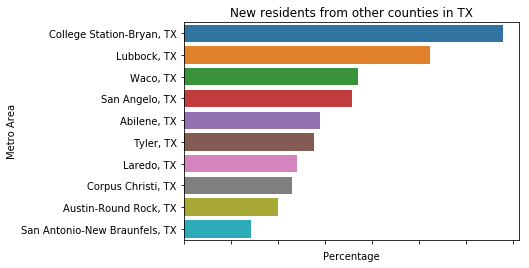

In [39]:
ax = sns.barplot(y = 'Geography',x = 'SS 18_19', data = tx_SS_18)
ax.set(ylabel='Metro Area', xlabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('New residents from other counties in TX')
plt.show()

### In which Texas cities are young professionals staying?

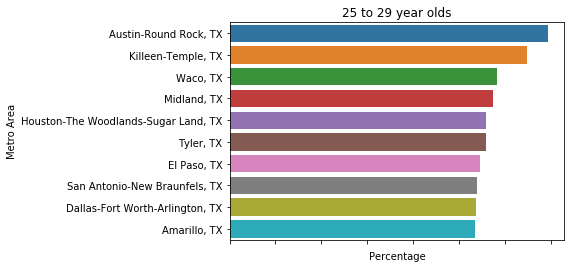

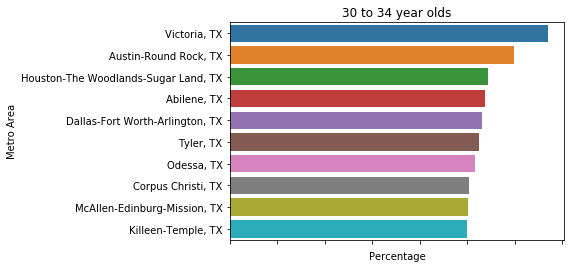

In [41]:
SC_25 = sort_by_per(m_17, 'SC', '25')
tx_SC_25 = SC_25[SC_25['State'] == 'TX'].head(10)
SC_30 = sort_by_per(m_17, 'SC', '30')
tx_SC_30 = SC_30[SC_30['State'] == 'TX'].head(10)


ax = sns.barplot(y = 'Geography',x = 'SC 25_29', data = tx_SC_25)
ax.set_title('25 to 29 year olds')
ax.set(ylabel='Metro Area', xlabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()


ax = sns.barplot(y = 'Geography',x = 'SC 30_34', data = tx_SC_30)
ax.set_title('30 to 34 year olds')
ax.set(ylabel='Metro Area', xlabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [56]:
tx_melt = melt(m_17, 'TX', 'Geography')
tx_melt = tx_melt.loc[tx_melt['variable'].str.contains('18|20|25|30|35|40|45|50|55|60|65|70|75')]
new = tx_melt['variable'].str.split(' ', expand = True)
tx_melt['Mobility'] = new[0]
tx_melt['v2'] = new[1]

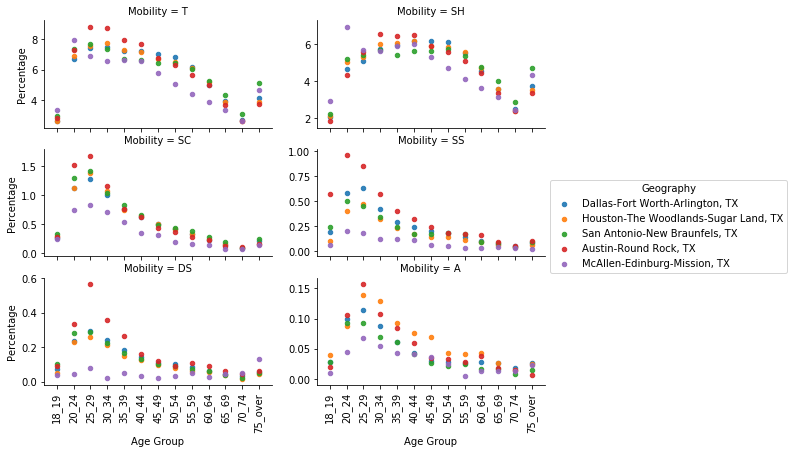

In [64]:
g = sns.FacetGrid(tx_melt, col="Mobility",  hue="Geography", col_wrap = 2, margin_titles=True, size = 2, aspect = 2, despine = True,sharey=False)
g.map(plt.scatter, 'v2',"Percentage", s=20, alpha=0.9)
g.set_axis_labels('Age Group','Percentage')
g.fig.subplots_adjust(wspace=.2, hspace=.2)
g.add_legend()
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)